# Создание и нормализация базы данных #

## Целевая схема БД ##

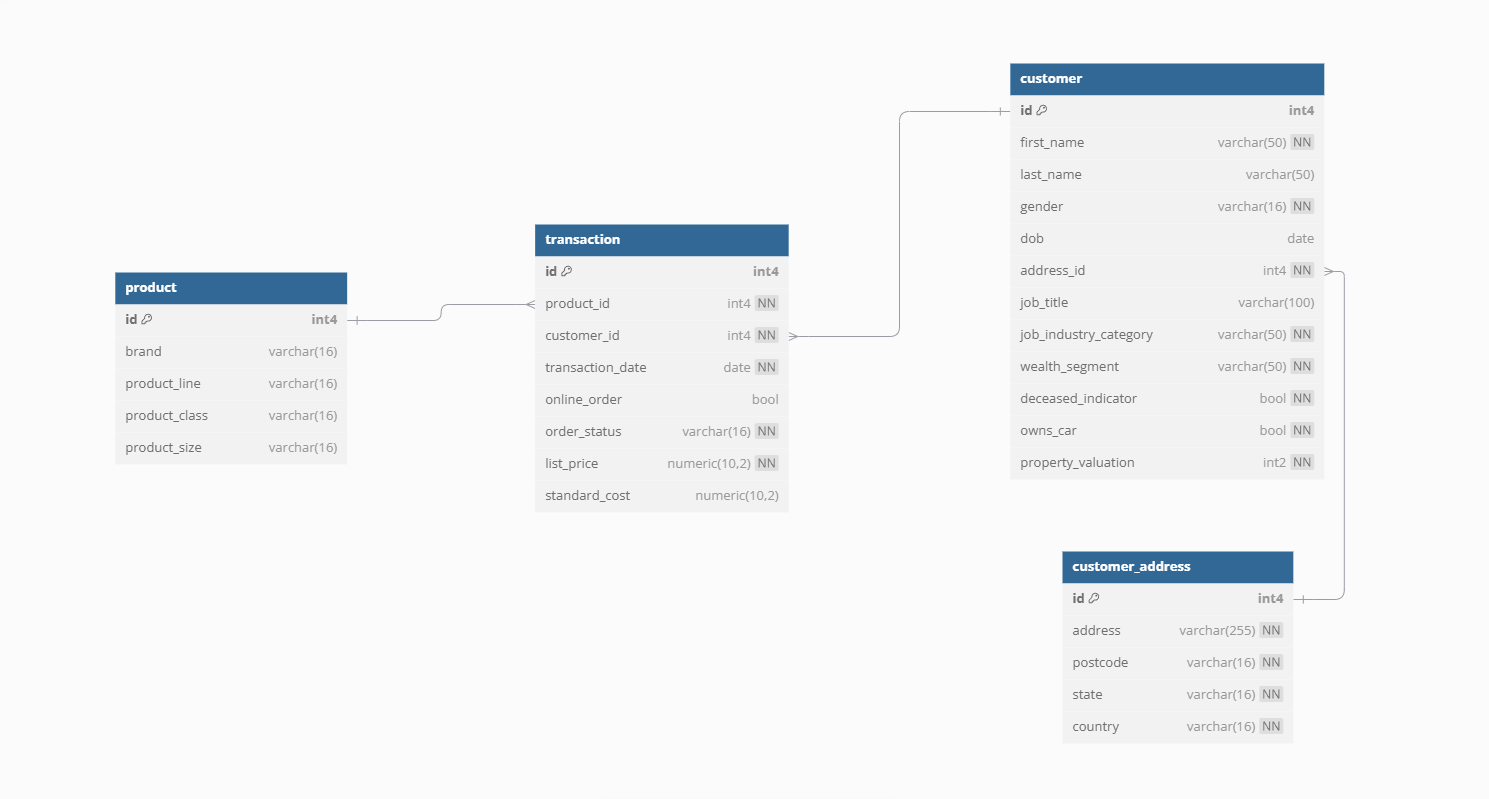

### DBML-скрипт ###
<code>
Table customer_address {
  id int4 [primary key]
  address varchar(255) [not null]
  postcode varchar(16) [not null]
  state varchar(16) [not null]
  country varchar(16) [not null]
}

Table customer {
  id int4 [primary key]
  first_name varchar(50) [not null]
  last_name varchar(50)
  gender varchar(16) [not null]
  dob date
  address_id int4 [not null]
  job_title varchar(100)
  job_industry_category varchar(50) [not null]
  wealth_segment varchar(50) [not null]
  deceased_indicator bool [not null]
  owns_car bool [not null]
  property_valuation int2 [not null]
}

Table product {
  id int4 [primary key]
  brand varchar(16)
  product_line varchar(16)
  product_class varchar(16)
  product_size varchar(16)
}

Table transaction {
  id int4 [primary key]
  product_id int4 [not null]
  customer_id int4 [not null]
  transaction_date date [not null]
  online_order bool
  order_status varchar(16) [not null]
  list_price numeric(10,2) [not null]
  standard_cost numeric(10,2)
}

Ref: transaction.product_id > product.id
Ref: transaction.customer_id > customer.id
Ref: customer.address_id > customer_address.id
</code>

## Преобразование структуры БД в 3NF ##

**Изначальная структура данных в постановке задачи не была нормализована.**

В таблице транзакций поля *brand*, *product_line*, *product_class* и *product_size* зависели от идентификатора транзакции, при этом являлись характеристиками другой сущности - продукта. Если один и тот же продукт участвует в нескольких транзакциях, информация о бренде, линейке продуктов, классе и размере будет дублироваться в каждой строке. Это увеличивает объем данных и усложняет их обновление.

В таблице клиентов данные в полях *address*, *postcode*, *state*, *country* зависели от идентификатора клиента, при этом являлись характеристиками другой сущности - адреса клиента. При первоначальной реализации, в случае если два клиента живут по одному адресу, информация о штате и стране будет дублироваться.

**В результате распределения данных по четырем таблицам (адреса клиентов, клиенты, продукты и транзакции) было достигнуто соответствие 3NF**:
- Таблицы соответствуют 1NF потому что все данные атомарны, нет повторяющихся групп;
- Таблицы соответствуют 2NF потому что все неключевые атрибуты зависят только от полного первичного ключа;
- Таблицы соответствуют 3NF потому что каждое поле зависит только от первичного ключа своей таблицы, все неключевые атрибуты зависят только от первичного ключа своей сущности.

**При преобразовании структуры в 3NF были обнаружены следующие недостатки в исходных данных:**
- У 197 транзакций отсутствовал продукт;
- Данные по продуктам не являлись консистентными: одному идентификатору могли соответствовать разные линейки продуктов. В результате введения синтетического ключа на основе полей *brand*, *product_line*, *product_class* и *product_size* были выделены 49 уникальных продуктов;
- В таблице транзакций был найден клиент с идентификатором 5034 с отсутствующими данными по нему.

## DDL-скрипт ##
<code>
-- Таблица адресов клиентов
create table if not exists customer_address (
  id serial primary key,
  address varchar(255) not null,
  postcode varchar(16) not null,
  state varchar(16) not null,
  country varchar(16) not null
);

-- Таблица клиентов
create table if not exists customer (
  id serial primary key,
  first_name varchar(50) not null,
  last_name varchar(50),
  gender varchar(16) not null,
  dob date,
  address_id int4 not null,
  job_title varchar(100),
  job_industry_category varchar(50) not null,
  wealth_segment varchar(50) not null,
  deceased_indicator bool not null,
  owns_car bool not null,
  property_valuation int2 not null,
  constraint fk_customer_address_id FOREIGN KEY (address_id) REFERENCES customer_address(id)
);

-- Таблица продуктов
create table if not exists product (
  id serial primary key,
  brand varchar(16),
  product_line varchar(16),
  product_class varchar(16),
  product_size varchar(16)
);

-- Таблица транзакций
create table if not exists transaction (
  id serial primary key,
  product_id int4 not null,
  customer_id int4 not null,
  transaction_date date not null,
  online_order bool,
  order_status varchar(16) not null,
  list_price numeric(10,2) not null,
  standard_cost numeric(10,2),
  constraint fk_transaction_product_id FOREIGN KEY (product_id) REFERENCES product(id),
  constraint fk_transaction_customer_id FOREIGN KEY (customer_id) REFERENCES customer(id)
);
</code>
*Поле postcode было задано типом varchar(16), т.к. в некоторых странах почтовые индексы могут содержать нечисловые символы.*

## Результат загрузки данных в таблицы ##

### Таблица customer_address ###

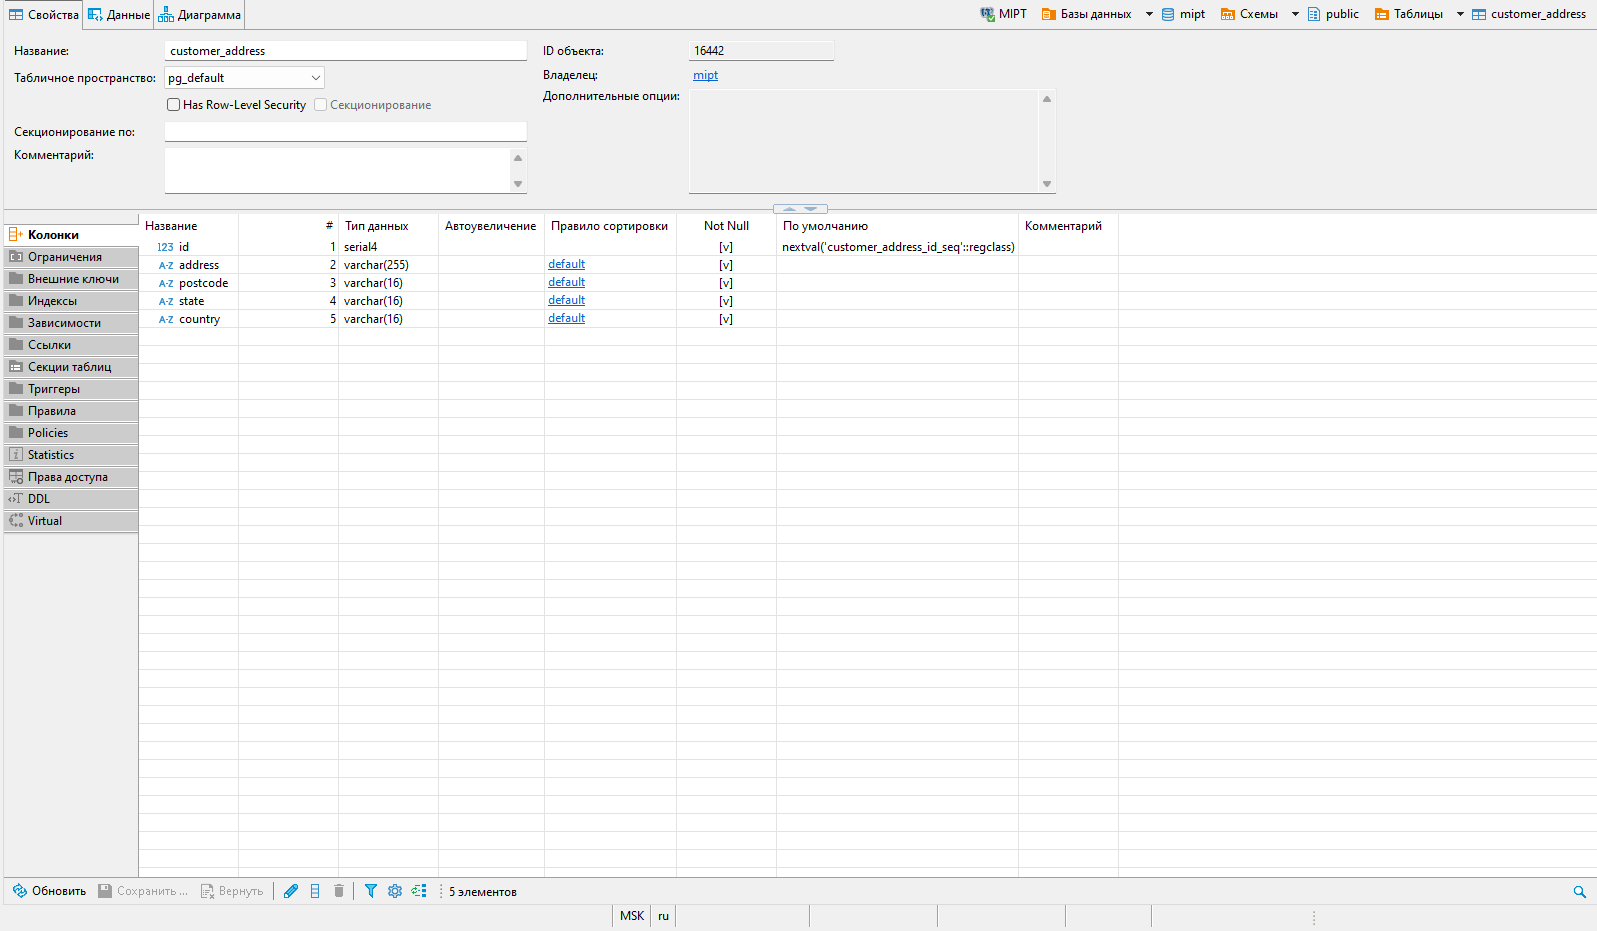
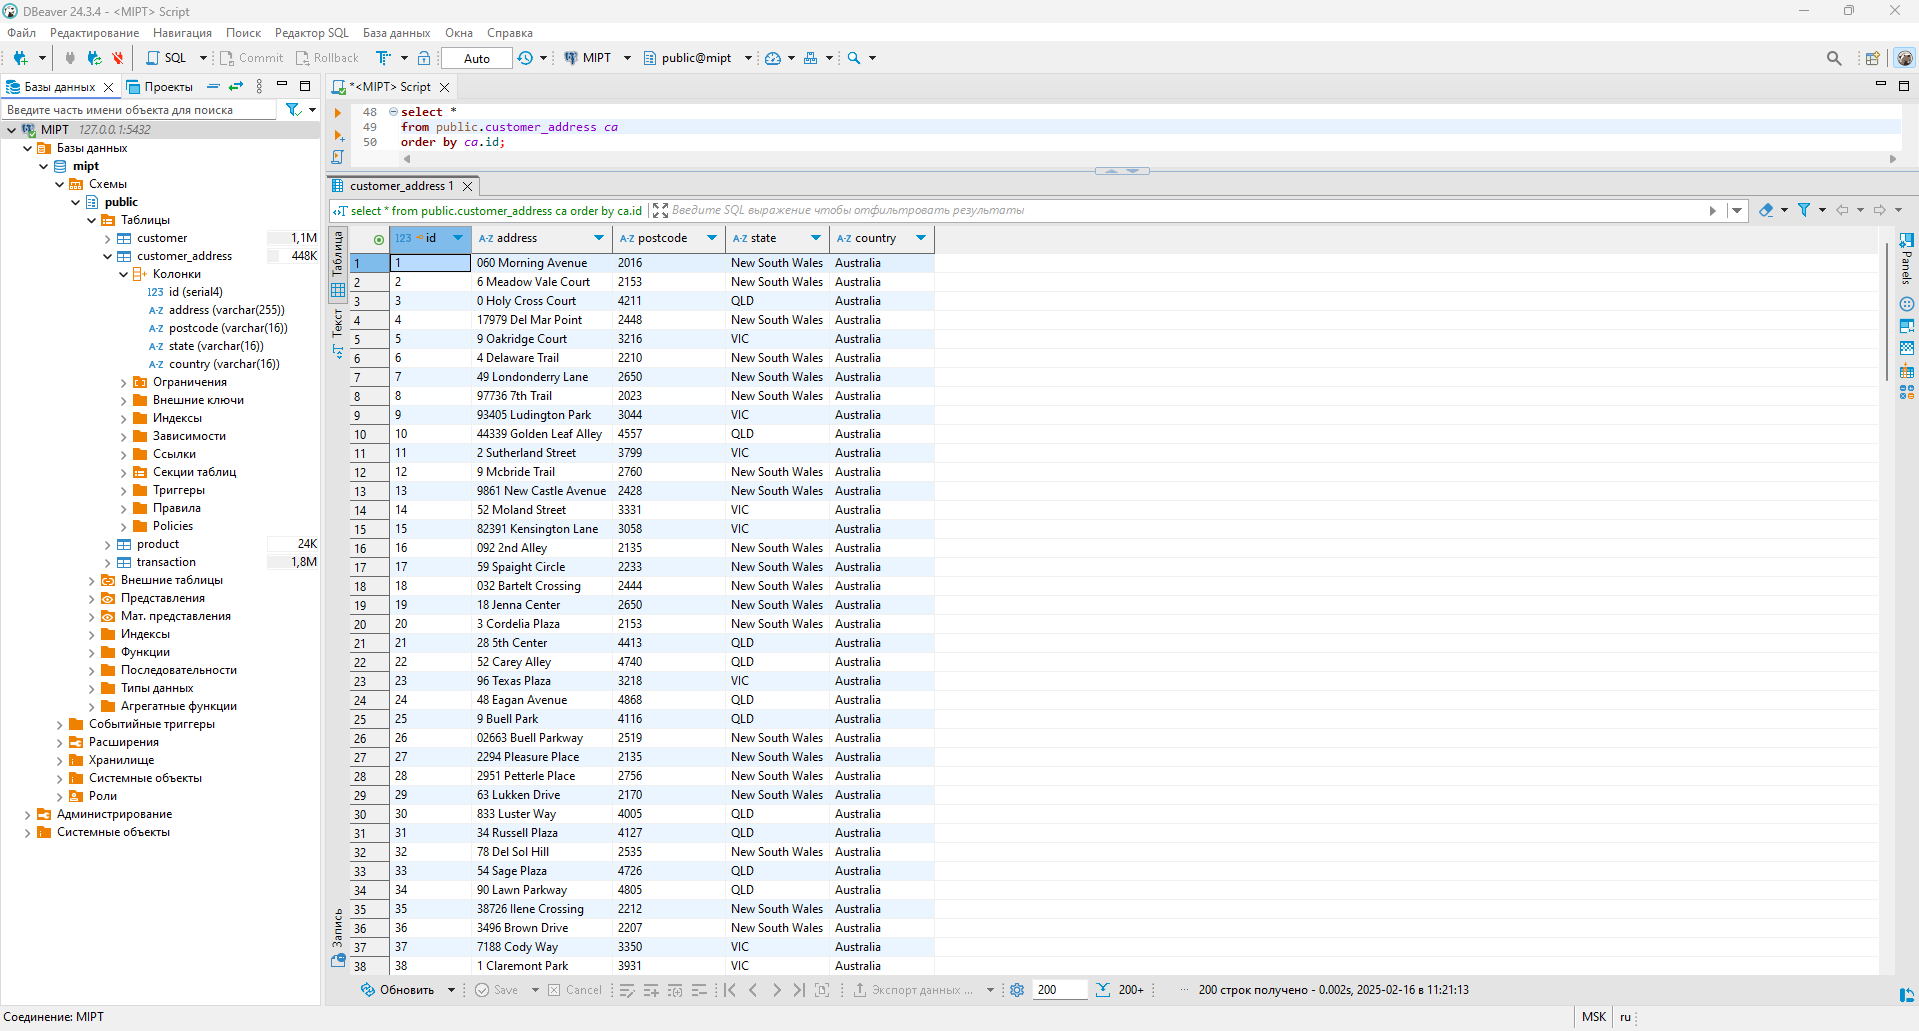

### Таблица customer ###

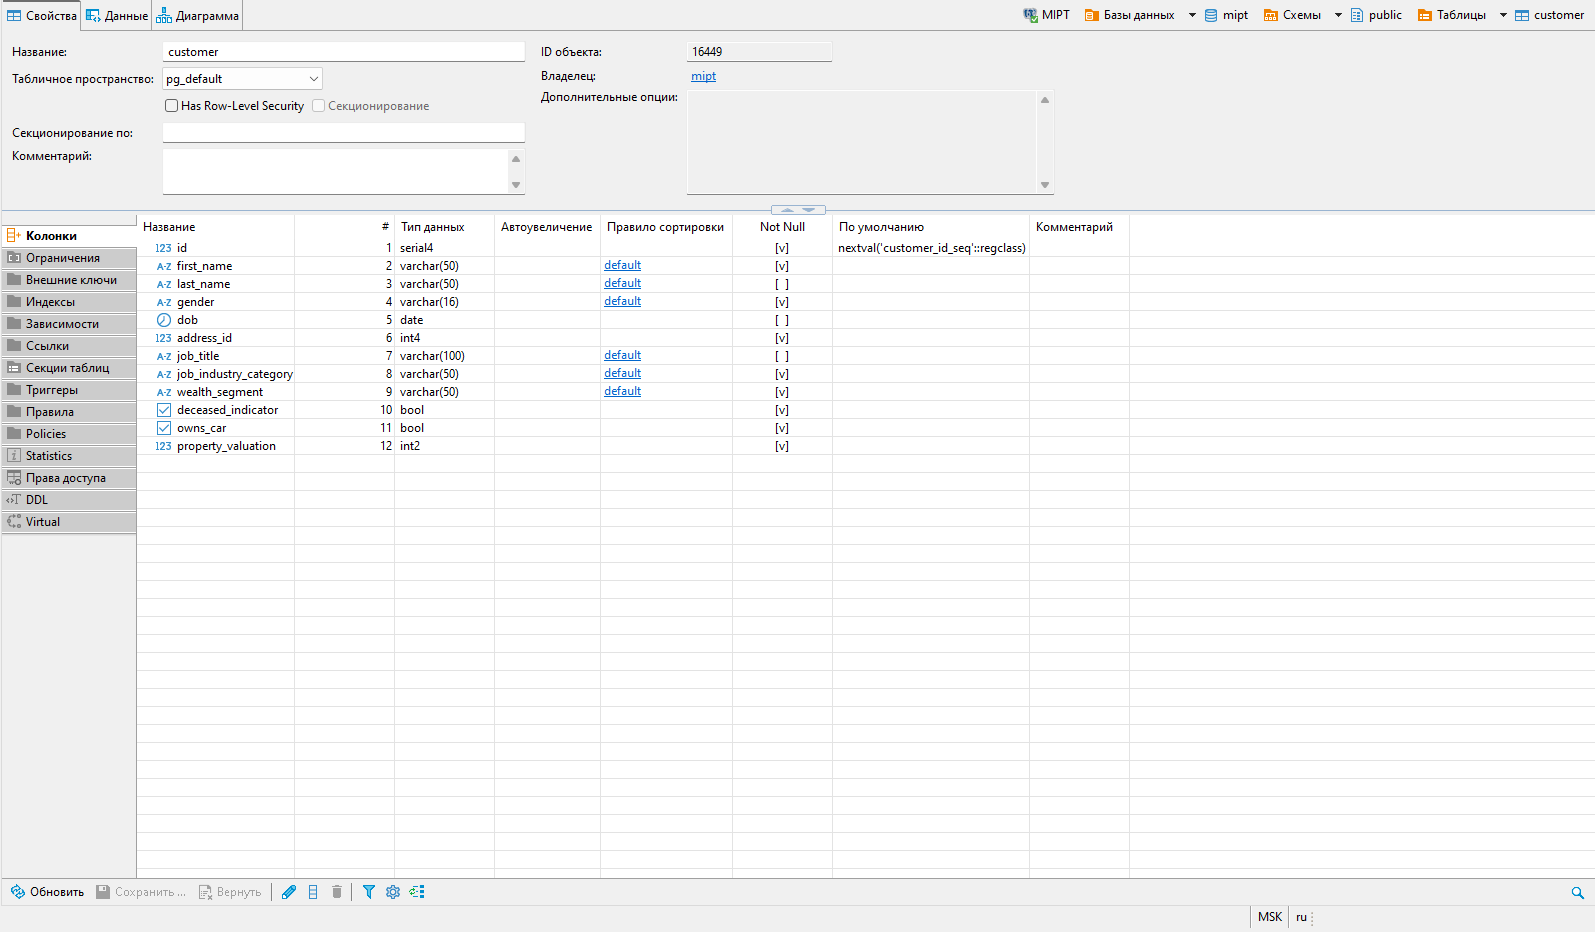
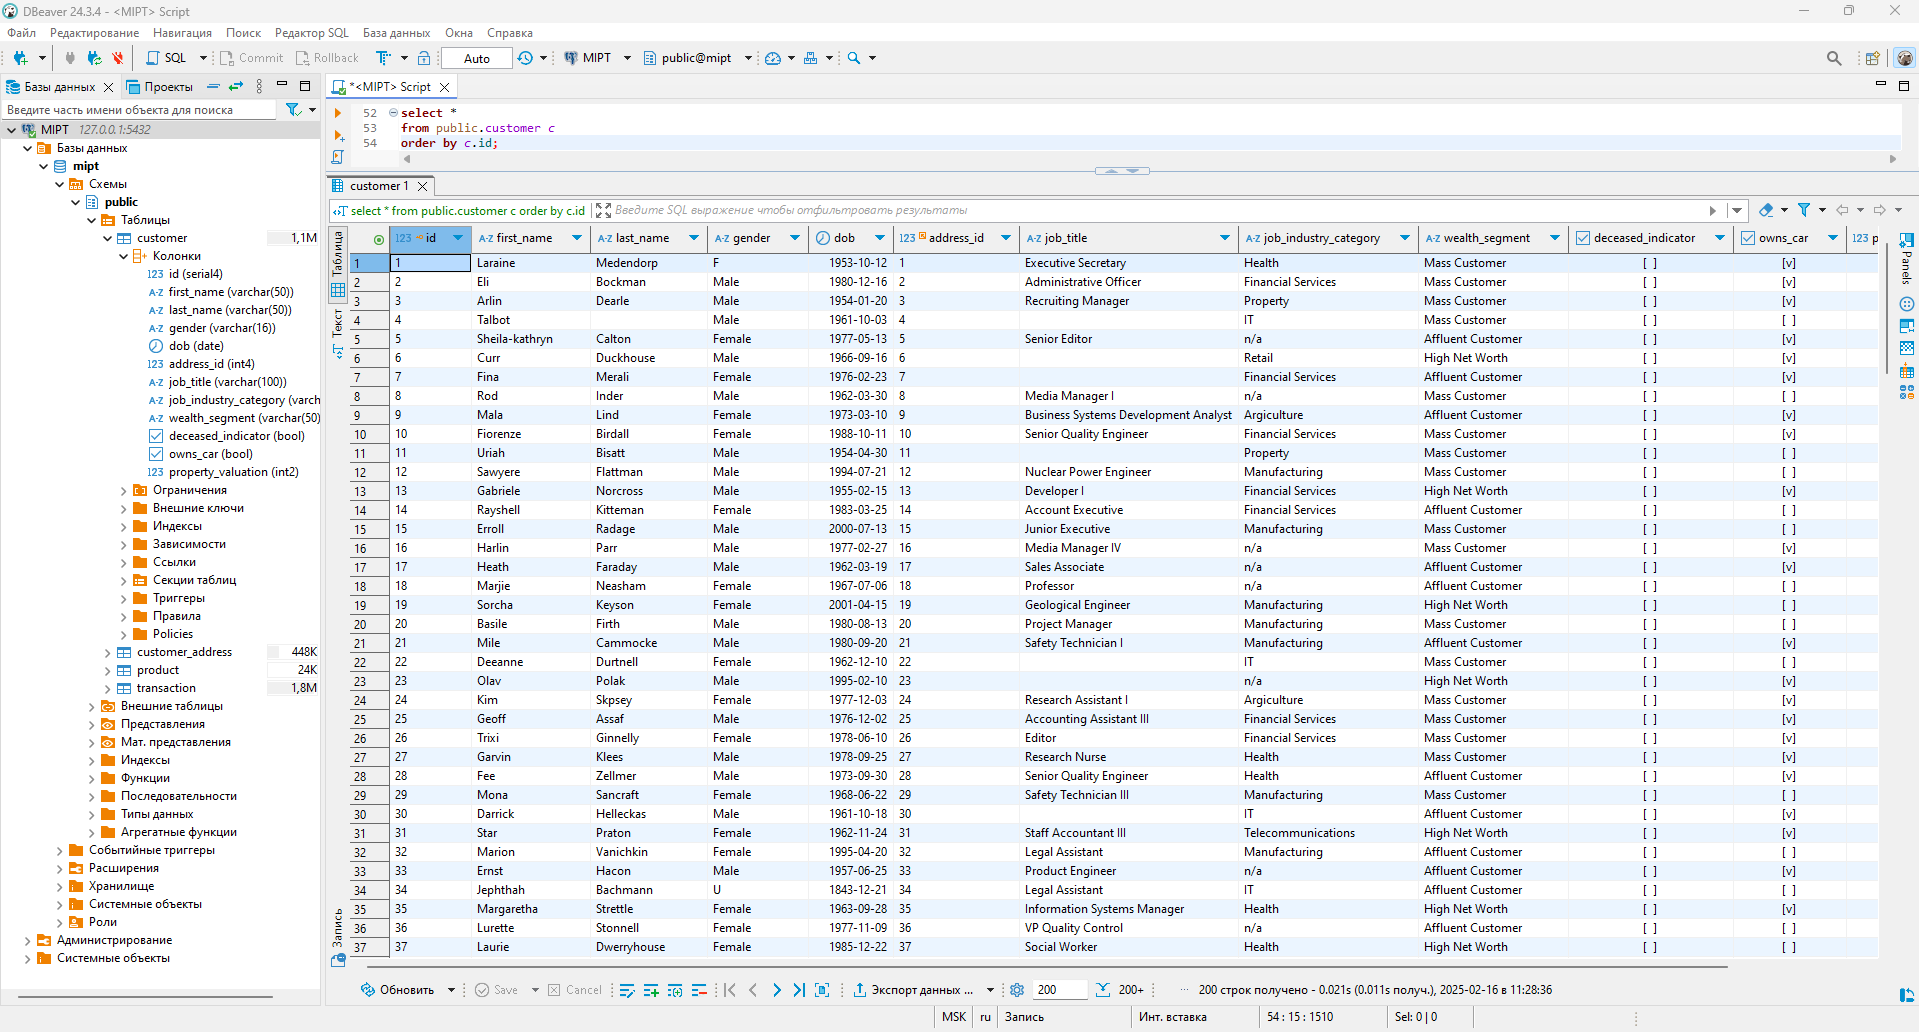

### Таблица product ###

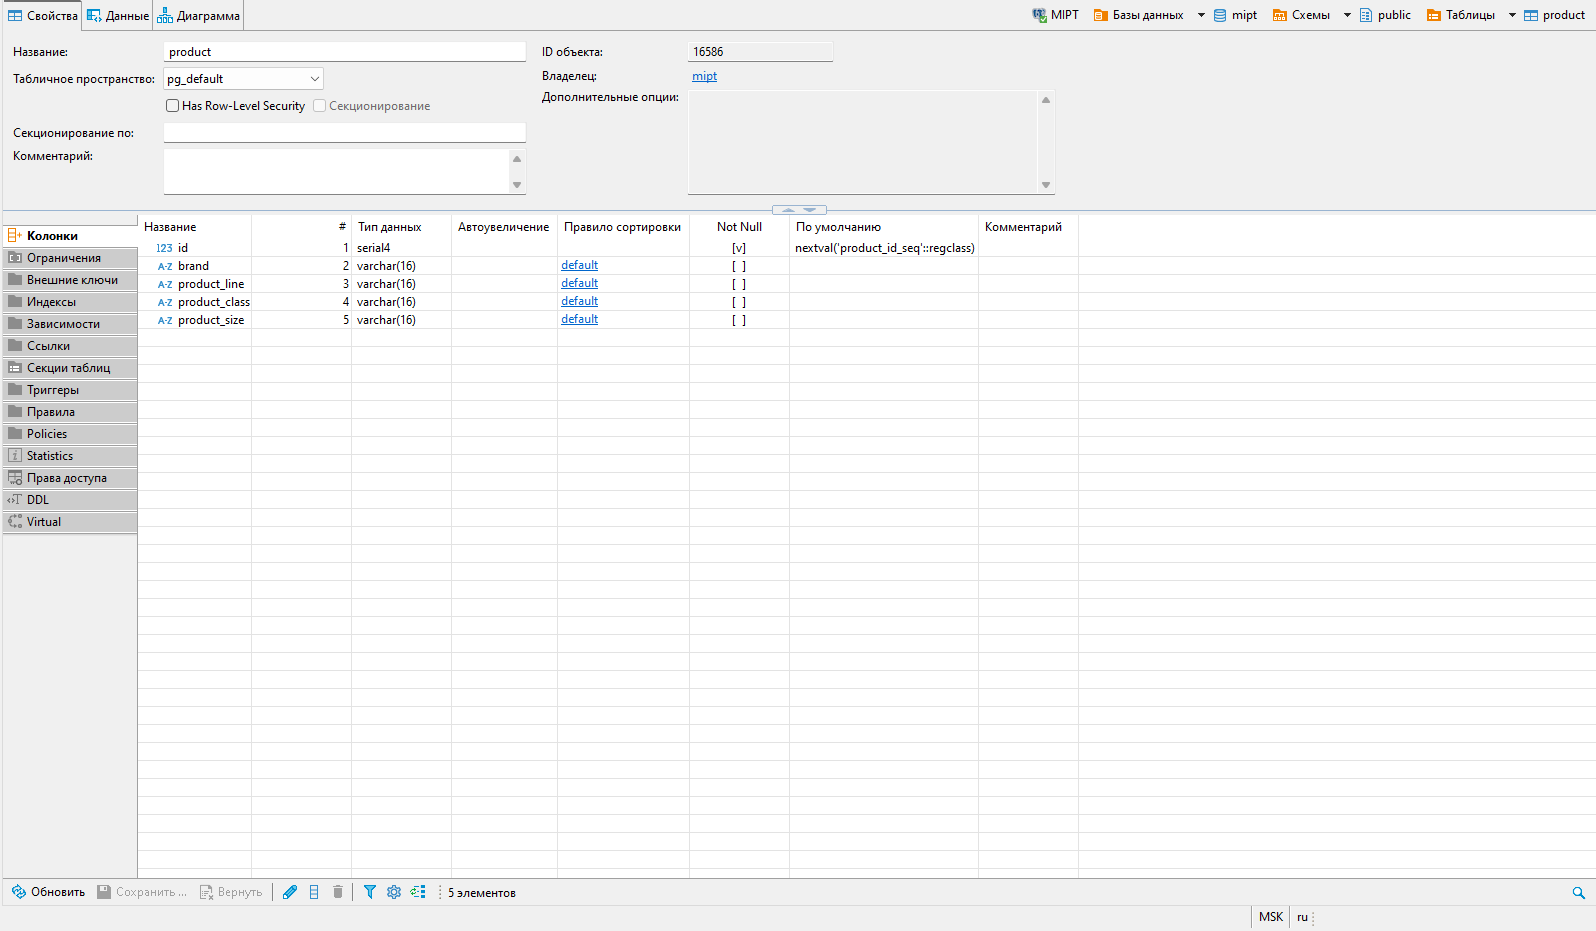
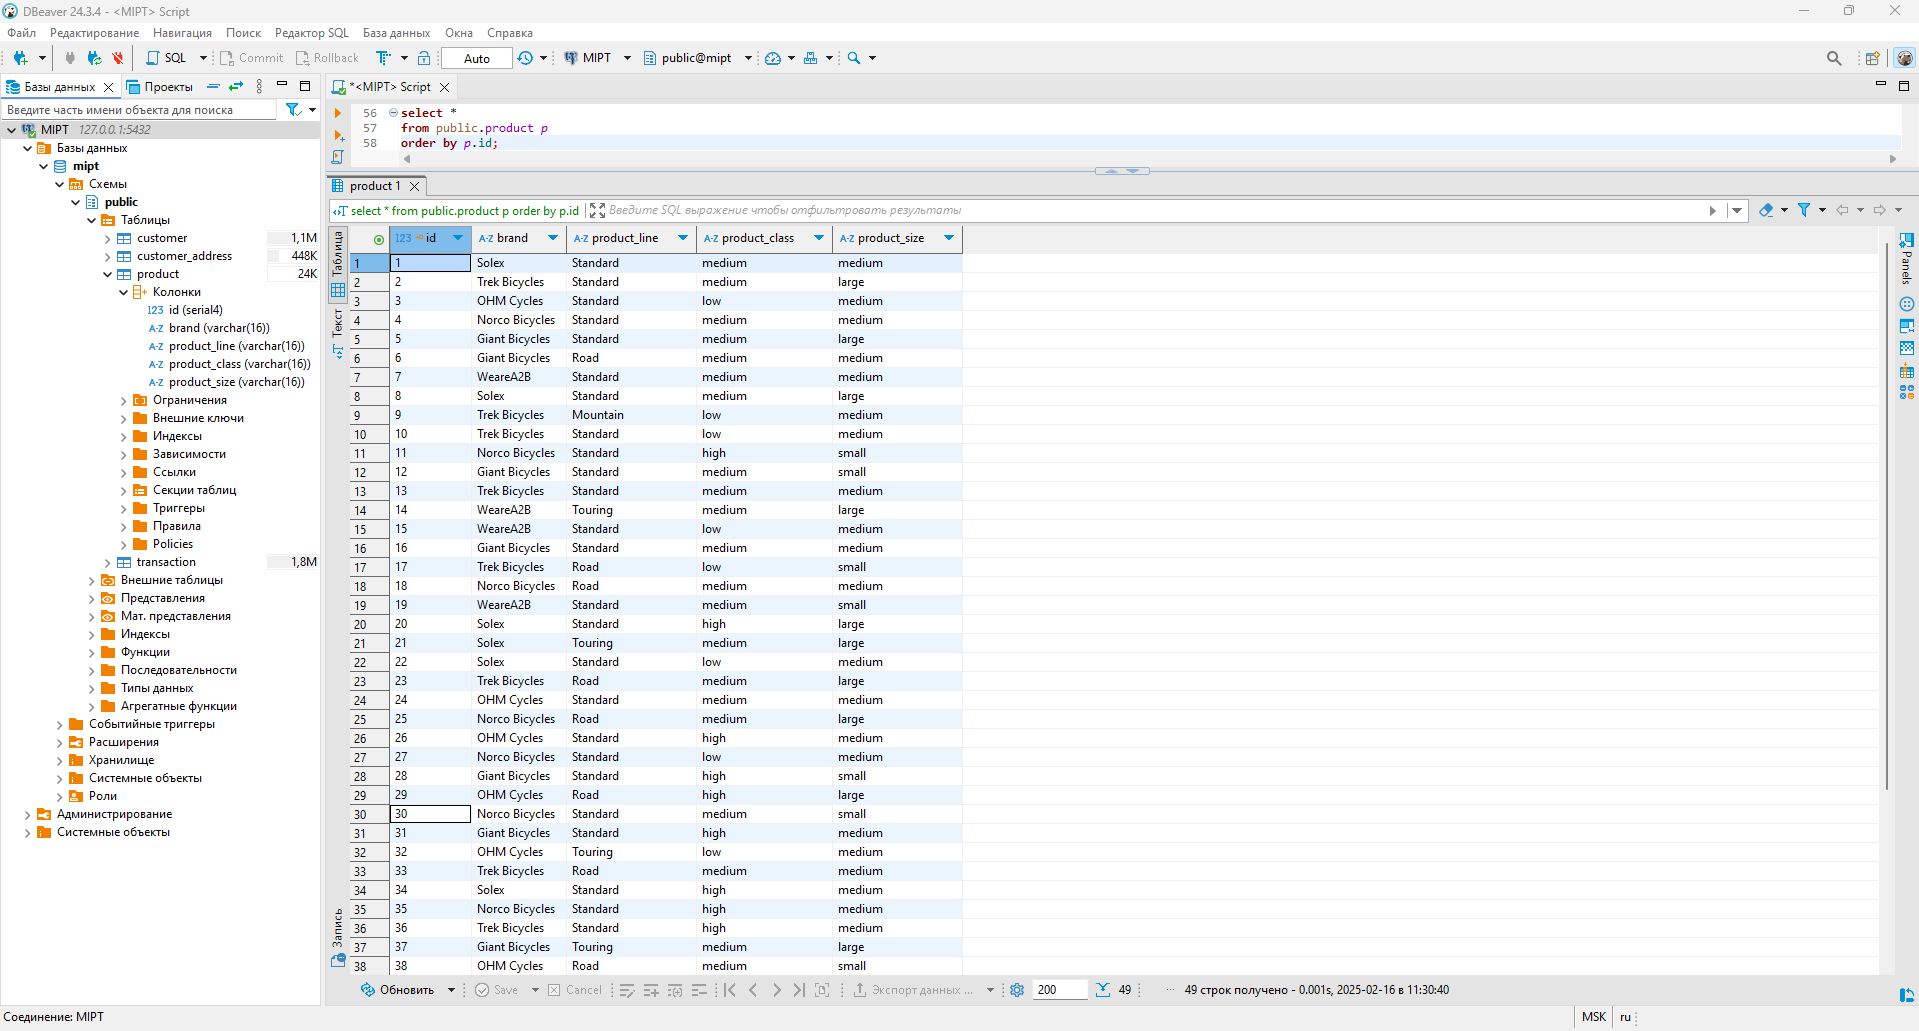

### Таблица transaction ###

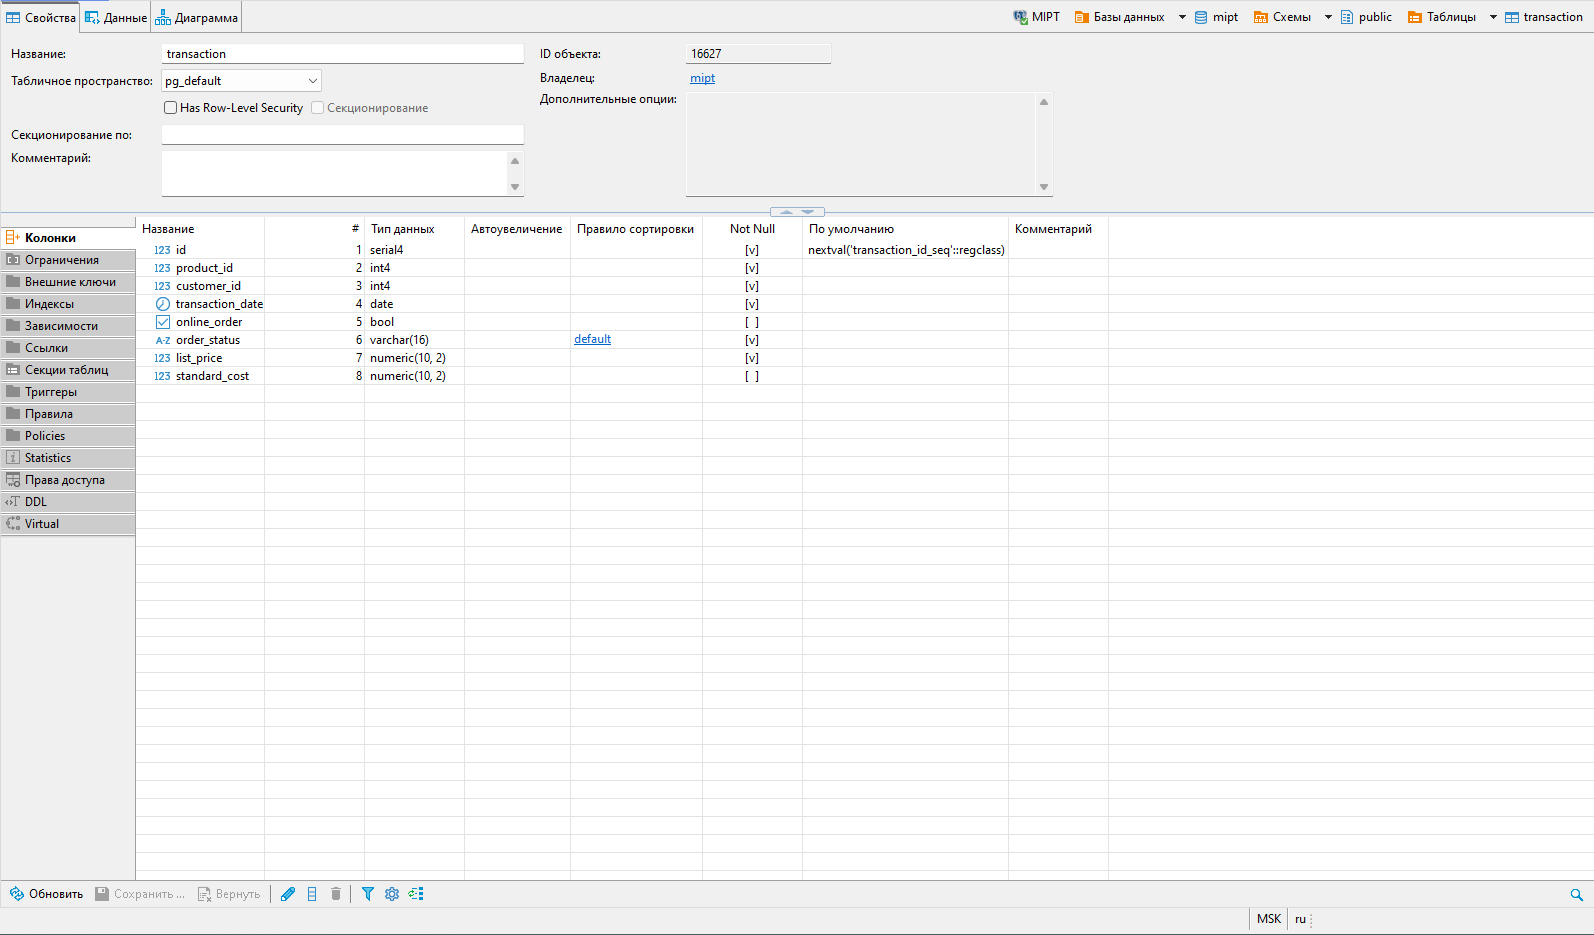
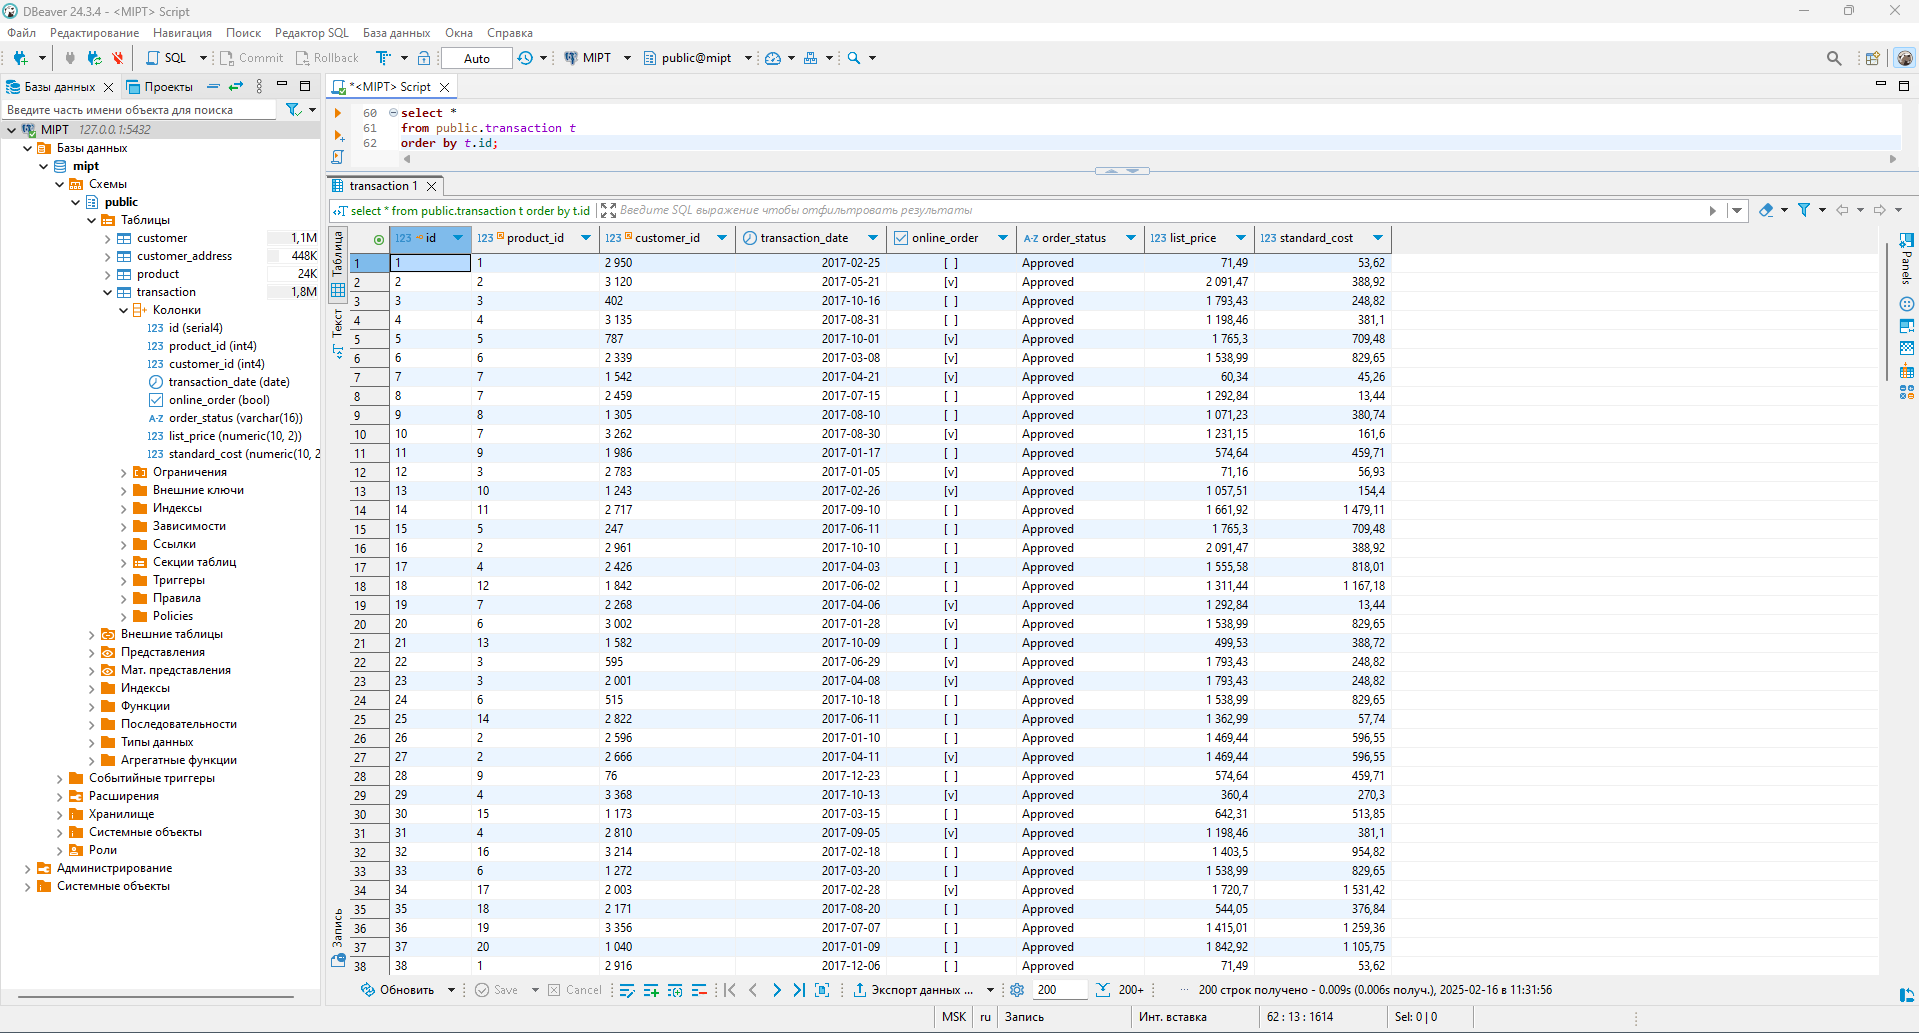

### Общее количество записей в таблицах ###

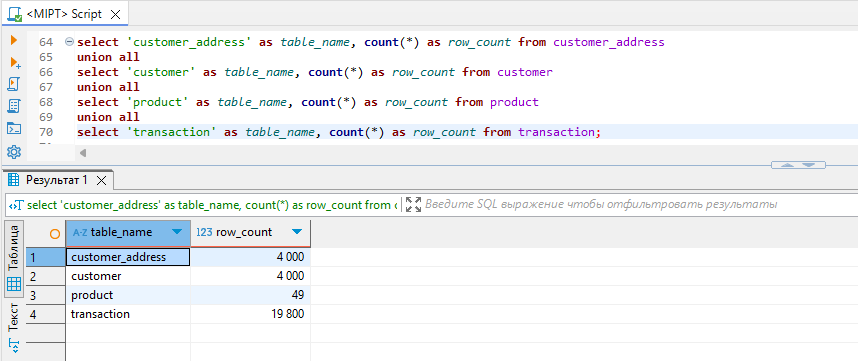